# Earth System Modeling - Data Analysis

In this document, we analysed the model results and created plots for the poster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import itertools

In [2]:
os.chdir('C:/Users/sarah/Documents/Uni/MSc/Earth System Modelling')
sys.path.append('C:/Users/sarah/Documents/Uni/MSc/Earth System Modelling')

In [3]:
# preprocess data
def prepro(raw_data):
    """ Preprocess data for SWBM
    Convert runoff, latent heat flux and solar net radiation to mm.
    Convert time to date.

    :param raw_data: raw input data (pandas df):
         -snr: surface net radiation
         -tp: total precipitation
         -ro: runoff
         -sm: soil moisture at the surface
         -le: latent heat flux
    :return: pre-processed data (pandas df)
    """

    data = {'time': pd.to_datetime(raw_data['time']),
            'lat': raw_data['latitude'],
            'long': raw_data['longitude'],
            'tp': raw_data['tp_[mm]'],
            'sm': raw_data['sm_[m3/m3]'] * 1000,
            'ro': raw_data['ro_[m]'] * 24000,
            'le': raw_data['le_[W/m2]'] * (86400 / 2260000),
            # 86400 (seconds) / 2260000 (latent heat of vaporization
            # of water in J/kg)
            'snr': raw_data['snr_[MJ/m2]'] * (1 / 2.26),
            'temp': raw_data['t2m_[K]'],
            }
    return pd.DataFrame(data)

## Analyse Data Spain

In [26]:
# read in data from excel sheet
# new model results
data_SPA_SM = pd.read_excel('Outputs_Spain(2).xlsx', sheet_name= 0)
data_SPA_SM = data_SPA_SM.rename(columns={0:'SM'})
data_SPA_RO = pd.read_excel('Outputs_Spain(2).xlsx', sheet_name= 1)
data_SPA_RO = data_SPA_RO.rename(columns={0:'RO'})
data_SPA_ET = pd.read_excel('Outputs_Spain(2).xlsx', sheet_name= 2)
data_SPA_ET = data_SPA_ET.rename(columns={0:'ET'})

data_SPA = pd.concat([data_SPA_SM, data_SPA_RO, data_SPA_ET], axis= 1)
data_SPA.head

<bound method NDFrame.head of               SM        RO        ET
0     189.000000  0.684796  0.486633
1     188.673998  3.276728  0.194354
2     189.262252  1.126650  0.902352
3     188.620324  8.122019  0.182306
4     190.383590  0.022119  0.168011
...          ...       ...       ...
1821  117.970349  0.000227  0.187891
1822  117.782950  0.017398  0.253594
1823  117.567263  0.000000  0.123045
1824  117.444219  0.000000  0.142857
1825  117.301362  0.000000  0.166601

[1826 rows x 3 columns]>

In [27]:
data_SPA_old = pd.read_csv("Data_swbm_Spain_new.csv")
data_SPA_old = prepro(data_SPA_old)

# reference data
data_SPA_ref = data_SPA_old.loc[data_SPA_old['time'] > '2013-12-31', ]
data_SPA_ref = data_SPA_ref.reset_index()
data_SPA_ref.head

<bound method NDFrame.head of       index       time     lat   long         tp         sm            ro  \
0      2192 2014-01-01  38.625 -3.625   0.845427  290.90020  1.504402e-03   
1      2193 2014-01-02  38.625 -3.625   4.059334  301.30333  2.618425e-02   
2      2194 2014-01-03  38.625 -3.625   1.387074  308.47746  9.566170e-03   
3      2195 2014-01-04  38.625 -3.625  10.067592  319.89723  7.001028e-02   
4      2196 2014-01-05  38.625 -3.625   0.026912  320.21484  1.665335e-13   
...     ...        ...     ...    ...        ...        ...           ...   
1821   4013 2018-12-27  38.625 -3.625   0.000720  241.67459  8.326673e-14   
1822   4014 2018-12-28  38.625 -3.625   0.055305  241.66703  8.326673e-14   
1823   4015 2018-12-29  38.625 -3.625   0.000000  240.93004  8.326673e-14   
1824   4016 2018-12-30  38.625 -3.625   0.000000  238.90391  8.326673e-14   
1825   4017 2018-12-31  38.625 -3.625   0.000000  236.46688  8.326673e-14   

            le       snr       temp  
0     0

In [28]:
# add timestamp
data_SPA['date']= data_SPA_ref['time']
data_SPA['date']= pd.to_datetime(data_SPA['date'])
data_SPA.head

<bound method NDFrame.head of               SM        RO        ET       date
0     189.000000  0.684796  0.486633 2014-01-01
1     188.673998  3.276728  0.194354 2014-01-02
2     189.262252  1.126650  0.902352 2014-01-03
3     188.620324  8.122019  0.182306 2014-01-04
4     190.383590  0.022119  0.168011 2014-01-05
...          ...       ...       ...        ...
1821  117.970349  0.000227  0.187891 2018-12-27
1822  117.782950  0.017398  0.253594 2018-12-28
1823  117.567263  0.000000  0.123045 2018-12-29
1824  117.444219  0.000000  0.142857 2018-12-30
1825  117.301362  0.000000  0.166601 2018-12-31

[1826 rows x 4 columns]>

In [29]:
# read in old model results
data_SPA_SM_om = pd.read_excel('Outputs_Spain(2).xlsx', sheet_name= 3)
data_SPA_SM_om = data_SPA_SM_om.rename(columns={0:'SM'})
data_SPA_RO_om = pd.read_excel('Outputs_Spain(2).xlsx', sheet_name= 4)
data_SPA_RO_om = data_SPA_RO_om.rename(columns={0:'RO'})
data_SPA_ET_om = pd.read_excel('Outputs_Spain(2).xlsx', sheet_name= 5)
data_SPA_ET_om = data_SPA_ET_om.rename(columns={0:'ET'})

data_SPA_om = pd.concat([data_SPA_SM_om, data_SPA_RO_om, data_SPA_ET_om], axis= 1)
data_SPA_om['date'] = data_SPA_ref['time']
data_SPA_om['date']= pd.to_datetime(data_SPA_om['date'])
data_SPA_om.head
#print(data_SPA_ref['time'])

<bound method NDFrame.head of               SM        RO        ET       date
0     189.000000  0.684796  0.459770 2014-01-01
1     188.700862  3.277661  0.162243 2014-01-02
2     189.320292  1.127341  0.697831 2014-01-03
3     188.882194  8.144587  0.161395 2014-01-04
4     190.643804  0.022179  0.176649 2014-01-05
...          ...       ...       ...        ...
1821  132.122385  0.000285  0.216905 2018-12-27
1822  131.905915  0.021820  0.326595 2018-12-28
1823  131.612806  0.000000  0.145626 2018-12-29
1824  131.467179  0.000000  0.161188 2018-12-30
1825  131.305992  0.000000  0.196102 2018-12-31

[1826 rows x 4 columns]>

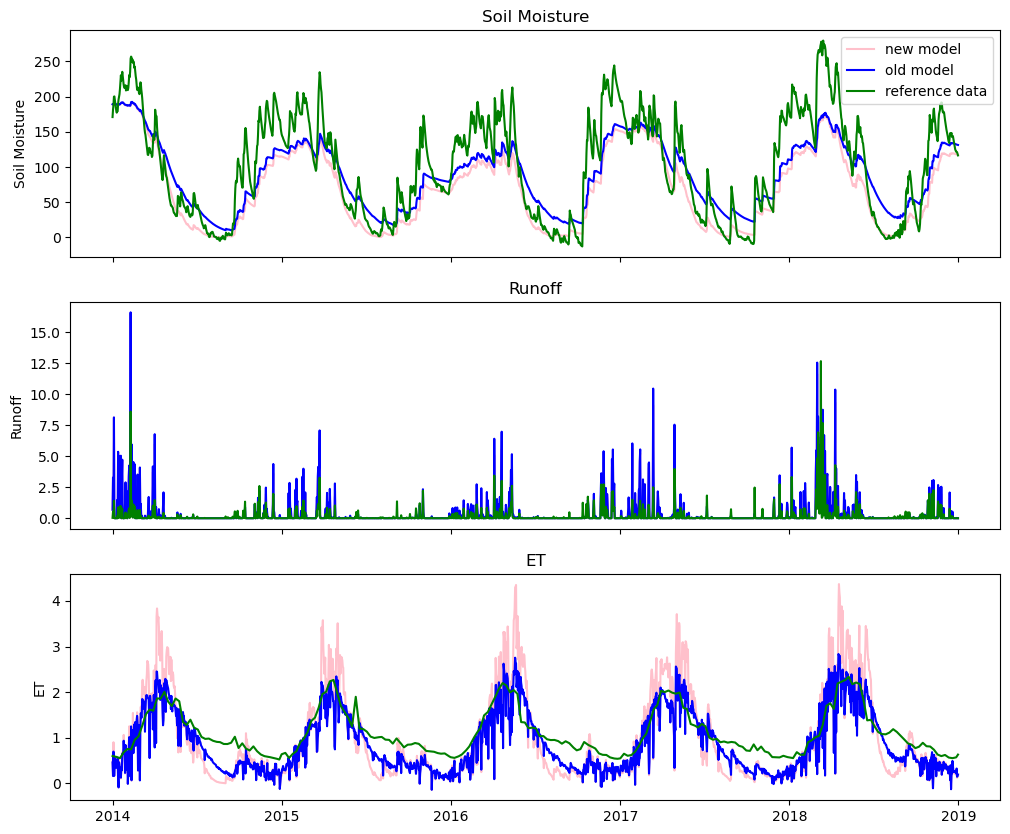

In [30]:
# create figure for overview in Spain with all variables and all data sets
fig, axes= plt.subplots(3,1, figsize=(12, 10), sharex=True)
axes[0].plot(data_SPA['date'], data_SPA['SM'], color= 'pink', label='new model')
axes[0].plot(data_SPA_om['date'], data_SPA_om['SM'], color= 'blue', label= 'old model')
axes[0].plot(data_SPA_ref['time'], data_SPA_ref['sm']-120, color= 'green', label= 'reference data')
axes[0].set_ylabel('Soil Moisture')
axes[0].set_title('Soil Moisture')
axes[0].legend()

axes[1].plot(data_SPA['date'], data_SPA['RO'], color= 'pink', label='new model')
axes[1].plot(data_SPA_om['date'], data_SPA_om['RO'], color= 'blue', label= 'old model')
axes[1].plot(data_SPA_ref['time'], data_SPA_ref['ro']*20, color= 'green', label= 'reference data')
axes[1].set_ylabel('Runoff')
axes[1].set_title('Runoff')
#axes[1].legend()

axes[2].plot(data_SPA['date'], data_SPA['ET'], color= 'pink', label='new model')
axes[2].plot(data_SPA_om['date'], data_SPA_om['ET'], color= 'blue', label= 'old model')
axes[2].plot(data_SPA_ref['time'], data_SPA_ref['le'], color= 'green', label= 'reference data')
axes[2].set_ylabel('ET')
axes[2].set_title('ET')
#axes[2].legend()

plt.show()

In [7]:
def model_correlation(data, model_outputs, start=None, end=None):
    """
    Calculate correlation between observed data and model outputs,
    optionally restricted to a timeframe.

    :param data: pandas DataFrame with columns 'sm', 'ro', 'le' (observed)
    :param model_outputs: tuple of numpy arrays (moists, runoffs, ets)
    :param start: str or datetime, start date for analysis (optional)
    :param end: str or datetime, end date for analysis (optional)
    :return: dict with individual correlations and sum of correlations
    """
    #moists, runoffs, ets = model_outputs
    moists = model_outputs.SM
    runoffs = model_outputs.RO
    ets = model_outputs.ET
   # print(moists)

    # Apply timeframe selection if provided
    if start is not None or end is not None:
        mask = (data['time'] >= pd.to_datetime(start) if start else True) & \
               (data['time'] <= pd.to_datetime(end) if end else True)
        data = data.loc[mask]
        moists = moists[data.index]
        runoffs = runoffs[data.index]
        ets = ets[data.index]

    # Compute correlations
    corr_sm = np.corrcoef(data['sm'], moists)[0, 1]
    corr_ro = np.corrcoef(data['ro'], runoffs)[0, 1]
    corr_et = np.corrcoef(data['le'], ets)[0, 1]

    corr_sum = corr_sm + corr_ro + corr_et

    return {'sm': corr_sm, 'ro': corr_ro, 'et': corr_et, 'sum': corr_sum}


### Seasonal correlation analysis

In [31]:
def get_season(date):
    """
    Assign season based on meteorological seasons:
    Spring: March, April, May
    Summer: June, July, August
    Fall: September, October, November
    Winter: December, January, February
    """
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:  # month in [12, 1, 2]
        return 'Winter'

# Apply to your dataframe
data_SPA['season'] = data_SPA['date'].apply(get_season)
data_SPA_ref['season'] = data_SPA_ref['time'].apply(get_season)
data_SPA_om['season'] = data_SPA_om['date'].apply(get_season)

In [ ]:
for x in ['Spring', 'Summer', 'Fall', 'Winter']:
  #  print(data_SPA_om[['SM', 'RO', 'ET']][data_SPA_om.season ==x])
    corrs_nm = model_correlation(data_SPA_ref[['sm', 'ro', 'le']][data_SPA_ref.season == x], data_SPA[['SM', 'RO', 'ET']][data_SPA.season ==x])
    corrs_om = model_correlation(data_SPA_ref[['sm', 'ro', 'le']][data_SPA_ref.season == x], data_SPA_om[['SM', 'RO', 'ET']][data_SPA_om.season ==x])
    print(f"new: {corrs_nm}, old: {corrs_om}")


Correlations (SM, RO, LE, SUM): 
Spring: 
    new model: 0.84, 0.80, 0.50, 2.14
    old model: 0.83, 0.80, 0.49, 2.12

Summer: 
    new model: 0.90, 0.51, 0.71, 2.12
    old model: 0.83, 0.80, 0.75, 2.38

Autumn: 
    new model: 0.91, 0.82, 0.21, 1.94
    old model: 0.89, 0.88, 0.33, 2.10

Winter: 
    new model: 0.76, 0.89,0.76, 2.41
    old model: 0.76, 0.90, 0.78, 2.44

Notes:
- in general: ET only improved slightly in spring, but all other seasons clearly worse, in autumn strongly decreased performance \
- SM didn't change or slightly increased (in summer and autumn) \
- runoff mostly didn't change but strongly decreased in summer \
- Sum only improved slightly in spring, but decreased in all other seasons (winter no strong change, but summer and autumn)

In [ ]:
corrs_nm = model_correlation(data_SPA_ref[['sm', 'ro', 'le']], data_SPA[['SM', 'RO', 'ET']])
corrs_om = model_correlation(data_SPA_ref[['sm', 'ro', 'le']], data_SPA_om[['SM', 'RO', 'ET']])
print(corrs_nm)
print(corrs_om)

In [32]:
#data_SPA_ref.head
data_SPA_ref[['time']][data_SPA_ref['time'].dt.year ==2017 ]
data_SPA['doy'] = data_SPA['date'].dt.day_of_year
data_SPA_ref['doy'] = data_SPA_ref['time'].dt.day_of_year
data_SPA_om['doy'] = data_SPA_om['date'].dt.day_of_year


In [ ]:
fig, axes = plt.subplots(2,1)
axes[0].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2017 ], data_SPA_ref[['tp']][data_SPA_ref['time'].dt.year ==2017 ])

axes[1].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2014 ], data_SPA_ref[['temp']][data_SPA_ref['time'].dt.year ==2014 ]-273.15, color= "grey", alpha= 0.5)
axes[1].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2015 ], data_SPA_ref[['temp']][data_SPA_ref['time'].dt.year ==2015 ]-273.15, color= "grey", alpha= 0.5)
axes[1].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2016 ], data_SPA_ref[['temp']][data_SPA_ref['time'].dt.year ==2016 ]-273.15, color= "grey", alpha= 0.5)
axes[1].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2017 ], data_SPA_ref[['temp']][data_SPA_ref['time'].dt.year ==2017 ]-273.15, color= "grey", alpha= 0.5)
axes[1].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2018 ], data_SPA_ref[['temp']][data_SPA_ref['time'].dt.year ==2018 ]-273.15, color= "grey", alpha= 0.5)
axes[1].plot(data_SPA_ref[['doy']][data_SPA_ref['time'].dt.year ==2017 ], data_SPA_ref[['temp']][data_SPA_ref['time'].dt.year ==2017 ]-273.15)

In [33]:
data_SPA_2017 = data_SPA[data_SPA['date'].dt.year == 2017]
data_SPA_ref_2017 = data_SPA_ref[data_SPA_ref['time'].dt.year == 2017]
data_SPA_om_2017 = data_SPA_om[data_SPA_om['date'].dt.year == 2017]

data_SPA_2015 = data_SPA[data_SPA['date'].dt.year == 2015]
data_SPA_ref_2015 = data_SPA_ref[data_SPA_ref['time'].dt.year == 2015]
data_SPA_om_2015 = data_SPA_om[data_SPA_om['date'].dt.year == 2015]

data_SPA_2018 = data_SPA[data_SPA['date'].dt.year == 2018]
data_SPA_ref_2018 = data_SPA_ref[data_SPA_ref['time'].dt.year == 2018]
data_SPA_om_2018 = data_SPA_om[data_SPA_om['date'].dt.year == 2018]


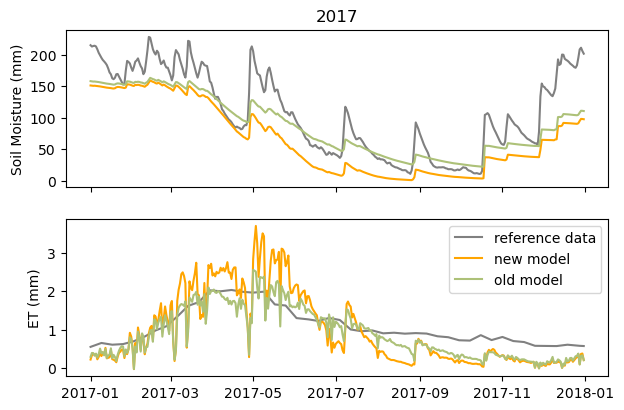

In [36]:
# create figure for poster
fig, axes= plt.subplots(2,1, figsize=(7, 4.5), sharex=True)
axes[0].plot(data_SPA_ref_2017['time'], data_SPA_ref_2017['sm']-100, color= 'grey', label= 'reference data')
axes[0].plot(data_SPA_2017['date'], data_SPA_2017['SM'], color= 'orange', label='new model')
axes[0].plot(data_SPA_om_2017['date'], data_SPA_om_2017['SM'], color= '#ADC178', label= 'old model')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('2017')
#axes[0].legend()

axes[1].plot(data_SPA_ref_2017['time'], data_SPA_ref_2017['le'], color= 'grey', label= 'reference data')
axes[1].plot(data_SPA_2017['date'], data_SPA_2017['ET'], color= 'orange', label='new model')
axes[1].plot(data_SPA_om_2017['date'], data_SPA_om_2017['ET'], color= '#ADC178', label= 'old model')
axes[1].set_ylabel('ET (mm)')
axes[1].legend()

#plt.show()
plt.savefig('SPA_2017_SM_ET.jpeg')

In [ ]:
# calculate seasonal correlations only in drought year 2017
for x in ['Spring', 'Summer', 'Fall', 'Winter']:
  #  print(data_SPA_om[['SM', 'RO', 'ET']][data_SPA_om.season ==x])
    corrs_nm = model_correlation(data_SPA_ref_2017[['sm', 'ro', 'le']][data_SPA_ref_2017.season == x], data_SPA_2017[['SM', 'RO', 'ET']][data_SPA_2017.season ==x])
    corrs_om = model_correlation(data_SPA_ref_2017[['sm', 'ro', 'le']][data_SPA_ref_2017.season == x], data_SPA_om_2017[['SM', 'RO', 'ET']][data_SPA_om_2017.season ==x])
    print(f"new: {corrs_nm}, old: {corrs_om}")

    print(model_correlation(data_SPA_ref_2017[['sm', 'ro', 'le']], data_SPA_2017[['SM', 'RO', 'ET']]))
    print(model_correlation(data_SPA_ref_2017[['sm', 'ro', 'le']], data_SPA_om_2017[['SM', 'RO', 'ET']]))
    

Notes:
- 2018: little change overall in new model, improvement of ET in spring, but worse in autumn, SM better in summer and winter, runoff got worse in all seasons 

- 2017: soil moisture partly better (in summer) partly worse (in spring & autumn), runoff always worse, ET always worse apart from winter, Sum always worse

In [ ]:
corrs_nm = model_correlation(data_SPA_ref_2018[['sm', 'ro', 'le']], data_SPA_2018[['SM', 'RO', 'ET']])
corrs_om = model_correlation(data_SPA_ref_2018[['sm', 'ro', 'le']], data_SPA_om_2018[['SM', 'RO', 'ET']])
print(f"new: {corrs_nm}, old: {corrs_om}")

corrs_nm = model_correlation(data_SPA_ref_2017[['sm', 'ro', 'le']], data_SPA_2017[['SM', 'RO', 'ET']])
corrs_om = model_correlation(data_SPA_ref_2017[['sm', 'ro', 'le']], data_SPA_om_2017[['SM', 'RO', 'ET']])
print(f"new: {corrs_nm}, old: {corrs_om}")

Notes: 
- in 2018: SM slighlty improved, runoff worse, et worse, sum worse

- in 2017: SM slightly improved, runoff worse, et worse, sum worse

## Analyse Data Sweden

In [17]:
data_SWE_SM = pd.read_excel('Outputs_Sweden(2).xlsx', sheet_name= 0)
data_SWE_SM = data_SWE_SM.rename(columns={0:'SM'})
data_SWE_RO = pd.read_excel('Outputs_Sweden(2).xlsx', sheet_name= 1)
data_SWE_RO = data_SWE_RO.rename(columns={0:'RO'})
data_SWE_ET = pd.read_excel('Outputs_Sweden(2).xlsx', sheet_name= 2)
data_SWE_ET = data_SWE_ET.rename(columns={0:'ET'})

data_SWE = pd.concat([data_SWE_SM, data_SWE_RO, data_SWE_ET], axis= 1)
#data_SPA.rename(columns={0:'SM',1: 'RO', 2: 'ET'}, axis="columns") #df.rename(index={0: "x", 1: "y", 2: "z"})
# add timestamp

data_SWE_old = pd.read_csv("Data_swbm_Sweden_new.csv")
#data_SPA_old['t2m_C'] = data_SPA_old['t2m_[K]']-273.15
#data_SPA_old['date'] = pd.to_datetime(data_SPA_old['time'])
#data_SPA_old['SM'] = data_SPA_old['sm_[m3/m3]']*1000
data_SWE_old = prepro(data_SWE_old)
data_SWE_ref = data_SWE_old.loc[data_SWE_old['time'] > '2013-12-31', ]
data_SWE_ref = data_SWE_ref.reset_index()
data_SWE_ref.head

data_SWE['date']= data_SWE_ref['time']
data_SWE['date']= pd.to_datetime(data_SWE['date'])
data_SWE.head


# read in old model results
data_SWE_SM_om = pd.read_excel('Outputs_Sweden(2).xlsx', sheet_name= 3)
data_SWE_SM_om = data_SWE_SM_om.rename(columns={0:'SM'})
data_SWE_RO_om = pd.read_excel('Outputs_Sweden(2).xlsx', sheet_name= 4)
data_SWE_RO_om = data_SWE_RO_om.rename(columns={0:'RO'})
data_SWE_ET_om = pd.read_excel('Outputs_Sweden(2).xlsx', sheet_name= 5)
data_SWE_ET_om = data_SWE_ET_om.rename(columns={0:'ET'})

data_SWE_om = pd.concat([data_SWE_SM_om, data_SWE_RO_om, data_SWE_ET_om], axis= 1)
data_SWE_om['date'] = data_SWE_ref['time']
data_SWE_om['date']= pd.to_datetime(data_SWE_om['date'])
data_SWE_om.head
#print(data_SPA_ref['time'])

# Apply to your dataframe
data_SWE['season'] = data_SWE['date'].apply(get_season)
data_SWE_ref['season'] = data_SWE_ref['time'].apply(get_season)
data_SWE_om['season'] = data_SWE_om['date'].apply(get_season)

model_cor_nm_all =  model_correlation(data_SWE_ref[['sm', 'ro', 'le']], data_SWE[['SM', 'RO', 'ET']])
model_cor_om_all =  model_correlation(data_SWE_ref[['sm', 'ro', 'le']], data_SWE_om[['SM', 'RO', 'ET']])

for x in ['Spring', 'Summer', 'Fall', 'Winter']:
  #  print(data_SPA_om[['SM', 'RO', 'ET']][data_SPA_om.season ==x])
    corrs_nm = model_correlation(data_SWE_ref[['sm', 'ro', 'le']][data_SWE_ref.season == x], data_SWE[['SM', 'RO', 'ET']][data_SWE.season ==x])
    corrs_om = model_correlation(data_SWE_ref[['sm', 'ro', 'le']][data_SWE_ref.season == x], data_SWE_om[['SM', 'RO', 'ET']][data_SWE_om.season ==x])
    print(f"new: {corrs_nm}, old: {corrs_om}")


new: {'sm': np.float64(-0.03410353079330832), 'ro': np.float64(0.1314688546966504), 'et': np.float64(0.8657787259877434), 'sum': np.float64(0.9631440498910855)}, old: {'sm': np.float64(-0.43259130723965916), 'ro': np.float64(-0.0559596404674082), 'et': np.float64(0.8352851707701189), 'sum': np.float64(0.3467342230630515)}
new: {'sm': np.float64(0.30311223963726014), 'ro': np.float64(-0.011012734557398322), 'et': np.float64(0.6148583467667366), 'sum': np.float64(0.9069578518465984)}, old: {'sm': np.float64(0.8344851964252774), 'ro': np.float64(0.18478922877581008), 'et': np.float64(0.5339329438615122), 'sum': np.float64(1.5532073690625996)}
new: {'sm': np.float64(0.47886075955837226), 'ro': np.float64(0.13936964615719868), 'et': np.float64(0.8580320471077291), 'sum': np.float64(1.4762624528233)}, old: {'sm': np.float64(0.5779420387398353), 'ro': np.float64(0.24414483737816028), 'et': np.float64(0.8259057386476506), 'sum': np.float64(1.6479926147656463)}
new: {'sm': np.float64(0.01224027

In [ ]:
print(model_cor_nm_all)
print(model_cor_om_all)

Model correlations SM, RO, ET, SUM
Spring: 
    new model: -0.034, 0.131, 0.866, 0.963
    old model: -0.433, -0.056, 0.835, 0.347

Summer: 
    new model: 0.303, -0.011, 0.615, 0.907
    old model: 0.834, 0.185, 0.534, 1.55

Autumn: 
    new model; 0.479, 0.139, 0.858, 1.476
    old model: 0.578, 0.244, 0.826, 1.648

Winter: 
    new model: 0.012, -0.034, -0.113, -0.134
    old model: -0.205, -0.050, 0.096, -0.159

## Analyse Data Germany

In [9]:
data_GER_SM = pd.read_excel('Outputs_Germany(2).xlsx', sheet_name= 0)
data_GER_SM = data_GER_SM.rename(columns={0:'SM'})
data_GER_RO = pd.read_excel('Outputs_Germany(2).xlsx', sheet_name= 1)
data_GER_RO = data_GER_RO.rename(columns={0:'RO'})
data_GER_ET = pd.read_excel('Outputs_Germany(2).xlsx', sheet_name= 2)
data_GER_ET = data_GER_ET.rename(columns={0:'ET'})

data_GER = pd.concat([data_GER_SM, data_GER_RO, data_GER_ET], axis= 1)
#data_SPA.rename(columns={0:'SM',1: 'RO', 2: 'ET'}, axis="columns") #df.rename(index={0: "x", 1: "y", 2: "z"})
# add timestamp

data_GER_old = pd.read_csv("Data_swbm_Germany_new.csv")
#data_SPA_old['t2m_C'] = data_SPA_old['t2m_[K]']-273.15
#data_SPA_old['date'] = pd.to_datetime(data_SPA_old['time'])
#data_SPA_old['SM'] = data_SPA_old['sm_[m3/m3]']*1000
data_GER_old = prepro(data_GER_old)
data_GER_ref = data_GER_old.loc[data_GER_old['time'] > '2013-12-31', ]
data_GER_ref = data_GER_ref.reset_index()
data_GER_ref.head

data_GER['date']= data_GER_ref['time']
data_GER['date']= pd.to_datetime(data_GER['date'])
data_GER.head


# read in old model results
data_GER_SM_om = pd.read_excel('Outputs_Germany(2).xlsx', sheet_name= 3)
data_GER_SM_om = data_GER_SM_om.rename(columns={0:'SM'})
data_GER_RO_om = pd.read_excel('Outputs_Germany(2).xlsx', sheet_name= 4)
data_GER_RO_om = data_GER_RO_om.rename(columns={0:'RO'})
data_GER_ET_om = pd.read_excel('Outputs_Germany(2).xlsx', sheet_name= 5)
data_GER_ET_om = data_GER_ET_om.rename(columns={0:'ET'})

data_GER_om = pd.concat([data_GER_SM_om, data_GER_RO_om, data_GER_ET_om], axis= 1)
data_GER_om['date'] = data_GER_ref['time']
data_GER_om['date']= pd.to_datetime(data_GER_om['date'])
data_GER_om.head
#print(data_SPA_ref['time'])

# Apply to your dataframe
data_GER['season'] = data_GER['date'].apply(get_season)
data_GER_ref['season'] = data_GER_ref['time'].apply(get_season)
data_GER_om['season'] = data_GER_om['date'].apply(get_season)

model_cor_nm_all =  model_correlation(data_GER_ref[['sm', 'ro', 'le']], data_GER[['SM', 'RO', 'ET']])
model_cor_om_all =  model_correlation(data_GER_ref[['sm', 'ro', 'le']], data_GER_om[['SM', 'RO', 'ET']])

for x in ['Spring', 'Summer', 'Fall', 'Winter']:
  #  print(data_SPA_om[['SM', 'RO', 'ET']][data_SPA_om.season ==x])
    corrs_nm = model_correlation(data_GER_ref[['sm', 'ro', 'le']][data_GER_ref.season == x], data_GER[['SM', 'RO', 'ET']][data_GER.season ==x])
    corrs_om = model_correlation(data_GER_ref[['sm', 'ro', 'le']][data_GER_ref.season == x], data_GER_om[['SM', 'RO', 'ET']][data_GER_om.season ==x])
    print(f"new: {corrs_nm}, old: {corrs_om}")

new: {'sm': np.float64(0.8104430162774002), 'ro': np.float64(0.6755903434850885), 'et': np.float64(0.7477030376244389), 'sum': np.float64(2.2337363973869273)}, old: {'sm': np.float64(0.7475163220616201), 'ro': np.float64(0.7007823846386991), 'et': np.float64(0.7115016319578734), 'sum': np.float64(2.1598003386581928)}
new: {'sm': np.float64(0.9207357439218982), 'ro': np.float64(0.8369120248944963), 'et': np.float64(0.4330008483666302), 'sum': np.float64(2.1906486171830246)}, old: {'sm': np.float64(0.8876500644172077), 'ro': np.float64(0.8379920535670955), 'et': np.float64(0.47936097070186046), 'sum': np.float64(2.205003088686164)}
new: {'sm': np.float64(0.9545690193008534), 'ro': np.float64(0.8233914991499769), 'et': np.float64(0.8612738827670745), 'sum': np.float64(2.6392344012179048)}, old: {'sm': np.float64(0.9406303517600154), 'ro': np.float64(0.7858786220698061), 'et': np.float64(0.8817285940304918), 'sum': np.float64(2.6082375678603134)}
new: {'sm': np.float64(0.28915032592782003)

Model correlations: (SM, RO, ET, Sum)
Spring: 
    new model: 0.810, 0.676, 0.748, 2.233
    old model: 0.748, 0.701, 0.712, 2.160

Summer: 
    new model: 0.921, 0.837, 0.433, 2.191
    old model: 0.888, 0.838, 0.479, 2.205

Autumn: 
    new model: 0.955, 0.823, 0.861, 2.639
    old model: 0.941, 0.786, 0.882, 2.608

Winter: 
    new model: 0.289, 0.625, 0.727, 1.641
    old model: 0.287, 0.628, 0.741, 1.656

In [ ]:
print(model_cor_nm_all)
print(model_cor_om_all)

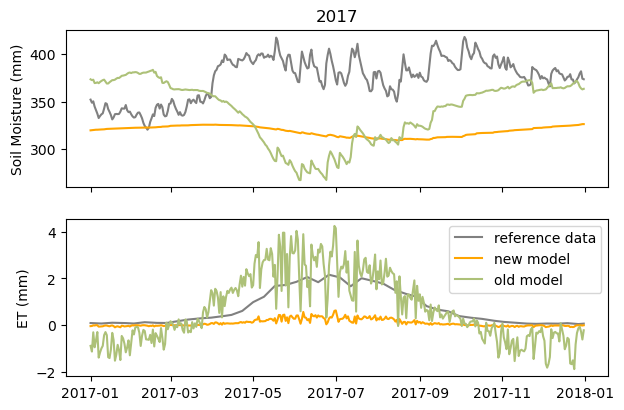

In [23]:
data_SWE_2017 = data_SWE[data_SWE['date'].dt.year == 2017]
data_SWE_ref_2017 = data_SWE_ref[data_SWE_ref['time'].dt.year == 2017]
data_SWE_om_2017 = data_SWE_om[data_SWE_om['date'].dt.year == 2017]

fig, axes= plt.subplots(2,1, figsize=(7, 4.5), sharex=True)
axes[0].plot(data_SWE_ref_2017['time'], data_SWE_ref_2017['sm'], color= 'grey', label= 'reference data')
axes[0].plot(data_SWE_2017['date'], data_SWE_2017['SM']-500, color= 'orange', label='new model')
axes[0].plot(data_SWE_om_2017['date'], data_SWE_om_2017['SM']+150, color= '#ADC178', label= 'old model')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('2017')
#axes[0].legend()

axes[1].plot(data_SWE_ref_2017['time'], data_SWE_ref_2017['le'], color= 'grey', label= 'reference data')
axes[1].plot(data_SWE_2017['date'], data_SWE_2017['ET'], color= 'orange', label='new model')
axes[1].plot(data_SWE_om_2017['date'], data_SWE_om_2017['ET'], color= '#ADC178', label= 'old model')
axes[1].set_ylabel('ET (mm)')
axes[1].legend()

#plt.show()
plt.savefig('SWE_2017_SM_ET_v3.jpeg')

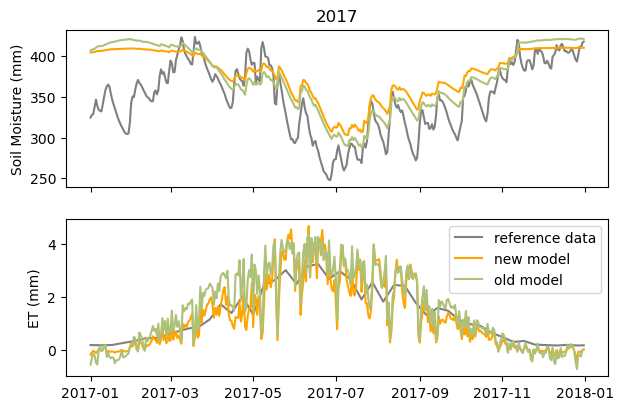

In [25]:
data_GER_2017 = data_GER[data_GER['date'].dt.year == 2017]
data_GER_ref_2017 = data_GER_ref[data_GER_ref['time'].dt.year == 2017]
data_GER_om_2017 = data_GER_om[data_GER_om['date'].dt.year == 2017]

fig, axes= plt.subplots(2,1, figsize=(7, 4.5), sharex=True)
axes[0].plot(data_GER_ref_2017['time'], data_GER_ref_2017['sm'], color= 'grey', label= 'reference data')
axes[0].plot(data_GER_2017['date'], data_GER_2017['SM']+200, color= 'orange', label='new model')
axes[0].plot(data_GER_om_2017['date'], data_GER_om_2017['SM'], color= '#ADC178', label= 'old model')
axes[0].set_ylabel('Soil Moisture (mm)')
axes[0].set_title('2017')
#axes[0].legend()

axes[1].plot(data_GER_ref_2017['time'], data_GER_ref_2017['le'], color= 'grey', label= 'reference data')
axes[1].plot(data_GER_2017['date'], data_GER_2017['ET'], color= 'orange', label='new model')
axes[1].plot(data_GER_om_2017['date'], data_GER_om_2017['ET'], color= '#ADC178', label= 'old model')
axes[1].set_ylabel('ET (mm)')
axes[1].legend()

#plt.show()
plt.savefig('GER_2017_SM_ET.jpeg')